In [2]:
import openpyxl
from pathlib import Path
data_folder=Path("C:/Users/msi/Desktop/proje/proje/dataset/")
file_to_open= data_folder/ "Online_Shopping.xlsx"
my_data=openpyxl.load_workbook(file_to_open)
my_sheet=my_data.active

In [3]:
all_times=set()
all_trans={}
all_items={}
for num,row in enumerate(my_sheet.iter_rows()):
    if num==0:
        continue
    else:
        temp=my_sheet.cell(row=num+1,column=1).value
        test_cell=my_sheet.cell(row=num+1,column=3).value
        price=my_sheet.cell(row=num+1,column=6).value
        if price!=0 and test_cell!=None:
            all_times.add(my_sheet.cell(row=num+1,column=5).value)
            if temp not in all_trans.keys():
                all_trans[temp]=[my_sheet.cell(row=num+1,column=2).value]
            else:
                all_trans[temp].append(my_sheet.cell(row=num+1,column=2).value)
for num,row in enumerate(my_sheet.iter_rows()):
    if num==0:
        continue
    else:
        temp=my_sheet.cell(row=num+1,column=2).value
        quantity=my_sheet.cell(row=num+1,column=4).value
        test_cell=my_sheet.cell(row=num+1,column=3).value
        price=my_sheet.cell(row=num+1,column=6).value
        if price!=0 and test_cell!=None:
            if temp not in all_items.keys():
                all_items[temp]=quantity
            else:
                all_items[temp]+=quantity

# Time Analysis

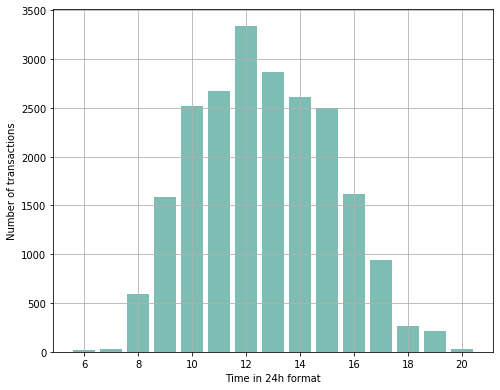

In [5]:
all_hours={}
for item in all_times:
    if item.hour in all_hours:
        all_hours[item.hour]+=1
    else:
        all_hours[item.hour]=1
new_all_hours={}
for key in sorted(all_hours.keys()):
    new_all_hours[key]=all_hours[key]
# print(new_all_hours)
# %matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20/2.54, 16/2.54]
plt.bar(new_all_hours.keys(),new_all_hours.values(),color='#7ebdb4')
plt.ylabel('Number of transactions')
plt.xlabel('Time in 24h format')
plt.grid()
plt.show()

# k_itemset and most_purchased items analysis

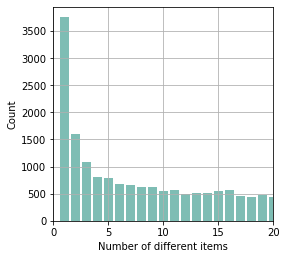

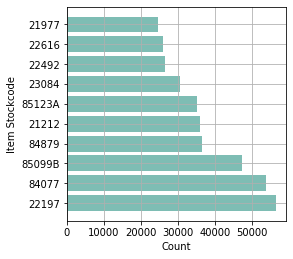

In [6]:
new_all_trans={key:len(value) for key,value in all_trans.items()}
quantity_dic={}
for item in sorted(new_all_trans.values()):
    if item not in quantity_dic:
        quantity_dic[item]=1
    else:
        quantity_dic[item]+=1
# new_all_items={}
all_items={str(key):value for key,value in all_items.items() if value>0}
all_items={k: v for k, v in sorted(all_items.items(), reverse=True, key=lambda item: item[1])}   
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10/2.54, 10/2.54]
plt.bar(quantity_dic.keys(),quantity_dic.values(),color='#7ebdb4')
plt.ylabel('Count')
plt.xlabel('Number of different items')
plt.xlim(0,20)
plt.grid()
plt.show()
################################
my_k=[item for i,item in enumerate(all_items.keys()) if i<10]
my_v=[item for i,item in enumerate(all_items.values()) if i<10]
plt.barh(my_k,my_v,color='#7ebdb4')
plt.ylabel('Item Stockcode')
plt.xlabel('Count')
plt.grid()
plt.show()